In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [15]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
           'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
           'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

df = pd.read_csv(path, names=columns)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

In [18]:
x = df.drop('class', axis=1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
gb=GaussianNB()
model=gb.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9218
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



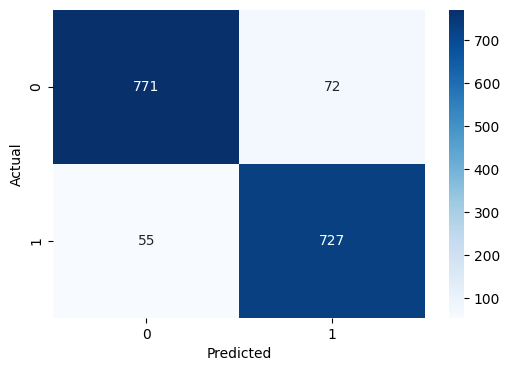

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
import joblib
joblib.dump(rf, 'mushroom_classifier.pkl')

['mushroom_classifier.pkl']

In [25]:
import joblib
import os

# Define the directory where you want to store the file
save_directory = "C:/project/ML assignment/"  # Example: a folder named 'models' in the current working directory

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Save the model in the specified directory
joblib.dump(rf, os.path.join(save_directory, "mushroom_classifier.pkl"))

print(f"Model saved in: {os.path.join(save_directory, 'mushroom_classifier.pkl')}")


Model saved in: C:/project/ML assignment/mushroom_classifier.pkl


In [26]:
import streamlit as st
import pickle
import numpy as np

# Load trained model
model = pickle.load(open("mushroom_classifier.pkl", "rb"))

# Feature selection (All 22 features)
feature_options = {
    "cap_shape": ["b", "c", "x", "f", "k", "s"],
    "cap_surface": ["f", "g", "y", "s"],
    "cap_color": ["n", "b", "c", "g", "r", "p", "u", "e", "w", "y"],
    "bruises": ["t", "f"],
    "odor": ["a", "l", "c", "y", "f", "m", "n", "p", "s"],
    "gill_attachment": ["a", "d", "f", "n"],
    "gill_spacing": ["c", "w", "d"],
    "gill_size": ["b", "n"],
    "gill_color": ["k", "n", "b", "h", "g", "r", "o", "p", "u", "e", "w", "y"],
    "stalk_shape": ["e", "t"],
    "stalk_root": ["b", "c", "u", "e", "z", "r", "?"],
    "stalk_surface_above_ring": ["f", "y", "k", "s"],
    "stalk_surface_below_ring": ["f", "y", "k", "s"],
    "stalk_color_above_ring": ["n", "b", "c", "g", "o", "p", "e", "w", "y"],
    "stalk_color_below_ring": ["n", "b", "c", "g", "o", "p", "e", "w", "y"],
    "veil_type": ["p", "u"],
    "veil_color": ["n", "o", "w", "y"],
    "ring_number": ["n", "o", "t"],
    "ring_type": ["c", "e", "f", "l", "n", "p", "s", "z"],
    "spore_print_color": ["k", "n", "b", "h", "r", "o", "u", "w", "y"],
    "population": ["a", "c", "n", "s", "v", "y"],
    "habitat": ["g", "l", "m", "p", "u", "w", "d"]
}

st.title("🍄 Mushroom Classifier")

user_input = [st.selectbox(f"{feature.replace('_', ' ').title()}", options) for feature, options in feature_options.items()]

if st.button("Predict"):
    features_encoded = np.array(user_input).reshape(1, -1)
    result = model.predict(features_encoded)[0]
    st.success(f"Prediction: {'✅ Edible' if result == 'e' else '⚠️ Poisonous'}")


2025-03-25 20:50:15.844 
  command:

    streamlit run C:\Users\ASUS\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-25 20:50:15.847 Session state does not function when running a script without `streamlit run`
